In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colors

/Users/thanasi/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [98]:
import subprocess

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import palettable as pbl
import h5py

In [3]:
cmap7 = pbl.colorbrewer.get_map('Set1', 'Qualitative', 7)
cmap11 = pbl.colorbrewer.get_map('Paired', 'Qualitative', 12)
c11s = cmap11.hex_colors
c11s = c11s[1::2] + c11s[::2] # unpair them

In [4]:
mpl.rc('image', cmap='coolwarm', interpolation='nearest')
mpl.rc('font', family='STIXGeneral')
mpl.rc('legend', fancybox=False, numpoints=1, markerscale=1.5, borderaxespad=0.5, fontsize=16)
mpl.rc('figure', figsize=(8,8))
mpl.rc('axes', linewidth=1.5, edgecolor='k', labelsize=22, grid=False, axisbelow=True,
        prop_cycle= mpl.cycler(color=c11s))
mpl.rc('grid', linewidth=1)
mpl.rc('ytick.major', size=5, width=1.5, pad=8)
mpl.rc('xtick.major', size=5, width=1.5, pad=8)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('lines', linewidth=2)

---

## Problem 3a

- Run MPB on the original original `.ctl` file, save output to a file, and plot the even $E_z$ (TM) modes as a function of $k.$ 
- Identify 'crossover points' (where modes begin to be guided) and compare to analytical prediction.
- Show effect of computational cell size

In [13]:
%%sh
cd 3a
mpb k-interp=1000 kmax=5 num-bands=10 2dwaveguide.ctl > 2dwaveguide.out
grep tmyevenfreqs: 2dwaveguide.out > tm.yeven.dat
cd ..


Some deprecated features have been used.  Set the environment
variable GUILE_WARN_DEPRECATED to "detailed" and rerun the
program to get more information.  Set it to "no" to suppress
this message.


In [14]:
# read in data output above
tm_yeven_df = pd.read_csv('./3a/tm.yeven.dat', index_col=[0,1], skipinitialspace=True).loc["tmyevenfreqs:"]

# get kx values
kx = tm_yeven_df.k1.values

# get frequency values for each band
omega_tme = tm_yeven_df[["tmyeven band %d" % i for i in range(1,11)]]

# drop any frequencies that are above the light line
# the where() function returns the array where the conditional is true
# with np.nan where it's false
# omega_tme = omega_tme.where(omega_tme.values <= kx[:,np.newaxis])

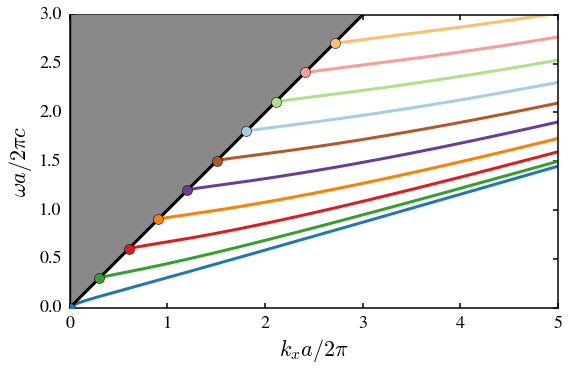

In [21]:
fig,ax = plt.subplots()
ax.plot(kx, omega_tme, '-', lw=3, ms=8);
ax.set_prop_cycle(None);
for n in range(len(ax.lines)):
    k0 = n / np.sqrt(11) 
    plt.plot(k0,k0,'o', ms=10, zorder=10);
ax.fill_between(kx, kx, 5, facecolor='#888888', edgecolor='k', linewidth=3, zorder=5)
ax.set_ylim(0,3);
ax.set_xlim(0,5);
ax.set_aspect('equal');
ax.set_xlabel(r"${k_x a}/{2\pi}$");
ax.set_ylabel(r"${\omega a}/{2\pi c}$");

fig.tight_layout()

fig.savefig("3a-1.pdf",  bbox_inches='tight', facecolor='none')

In [8]:
%%sh
cd 3a
mpb k-interp=1000 kmax=5 Y=2 num-bands=10 2dwaveguide.ctl > 2dwaveguide-Y2.out
grep tmyevenfreqs: 2dwaveguide-Y2.out > tm.yeven-Y2.dat
cd ..


Some deprecated features have been used.  Set the environment
variable GUILE_WARN_DEPRECATED to "detailed" and rerun the
program to get more information.  Set it to "no" to suppress
this message.


In [68]:
# read in data output above
tm_yeven_df_B = pd.read_csv('./3a/tm.yeven-Y2.dat', index_col=[0,1], skipinitialspace=True).loc["tmyevenfreqs:"]

# get kx values
kx_B = tm_yeven_df_B.k1.values

# get frequency values for each band
omega_tme_B = tm_yeven_df_B[["tmyeven band %d" % i for i in range(1,11)]]



In [69]:
fig,ax = plt.subplots()
ax.plot(kx, omega_tme, '-', lw=3, ms=8);
ax.set_prop_cycle(None);
ax.plot(kx_B, omega_tme_B, '--', lw=3, ms=8);
ax.set_prop_cycle(None);
for n in range(len(ax.lines)):
    k0 = n / np.sqrt(11) 
    plt.plot(k0,k0,'s', ms=10, zorder=10);
ax.fill_between(kx, kx, 5, facecolor='#888888', edgecolor='k', linewidth=3, zorder=5)
ax.set_ylim(0.25,0.35);
ax.set_xlim(0.25, 0.35);
ax.set_aspect('equal');
ax.set_xlabel(r"${k_x a}/{2\pi}$");
ax.set_ylabel(r"${\omega a}/{2\pi c}$");

fig.tight_layout()
fig.savefig("3a-2.pdf", bbox_inches='tight', facecolor='none')

---

### Problem 3b

Plot $E$-fields of TM guided modes on log scale

In [70]:
field_data_11 = h5py.File('./3a/2dwaveguide-e.k01.b01.z.tm.h5')
field_data_12 = h5py.File('./3a/2dwaveguide-e.k01.b02.z.tm.h5')
field_data_13 = h5py.File('./3a/2dwaveguide-e.k01.b03.z.tm.h5')

In [71]:
for dataset in field_data_11:
    print(dataset)

Bloch wavevector
description
lattice vectors
z.i
z.r


In [72]:
print(field_data_11["description"].value)

b'e field, kpoint 1, band 1, freq=0.308793'


In [73]:
print(field_data_11["Bloch wavevector"].value)

[ 1.  0.  0.]


In [74]:
print(field_data_11["lattice vectors"].value)
Y_size = field_data_11["lattice vectors"].value[1,1]

[[  1.   0.   0.]
 [  0.  10.   0.]
 [  0.   0.   1.]]


In [75]:
E11 = field_data_11["z.r"].value
E12 = field_data_12["z.r"].value
E13 = field_data_13["z.r"].value

nY = E11.shape[1]

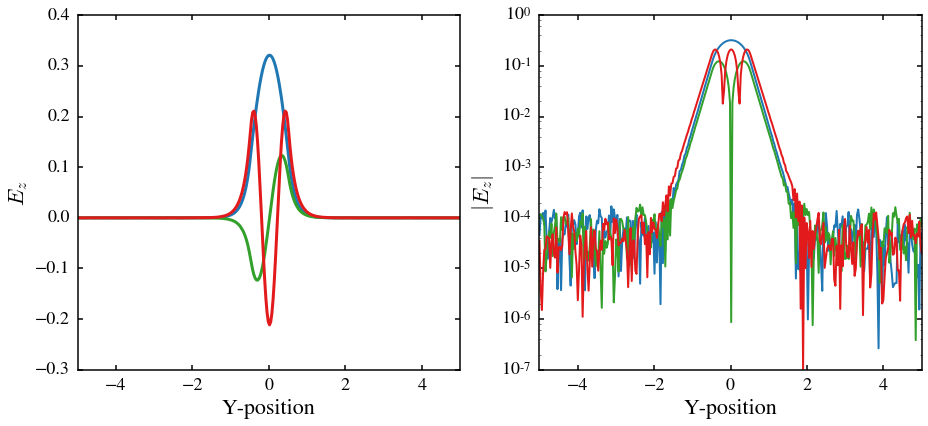

In [76]:
fig,ax = plt.subplots(1,2,figsize=(13,6))

Y = np.mgrid[-Y_size/2:Y_size/2:1j*nY]

ax[0].plot(Y, E11.T, lw=3)
ax[0].plot(Y, E12.T, lw=3)
ax[0].plot(Y, E13.T, lw=3)
ax[0].set_xlabel("Y-position");
ax[0].set_ylabel("$E_z$");

ax[1].plot(Y, np.abs(E11.T))
ax[1].plot(Y, np.abs(E12.T))
ax[1].plot(Y, np.abs(E13.T))
ax[1].set_xlabel("Y-position");
ax[1].set_ylabel("$|E_z|$");
ax[1].set_yscale('log');

for a in ax:
    a.set_xlim(-Y_size/2, Y_size/2)

fig.tight_layout()
fig.savefig("3b-1.pdf", bbox_inches='tight', facecolor='none')

In [77]:
field_data_11.close()
field_data_12.close()
field_data_13.close()

---

### Problem 3c

- Modified structure (epsilon plotted below). 
- find band structure for TM bands
  - demonstrate and find low-$\omega$ cutoff

In [33]:
%%sh
cd 3c
mpb num-bands=20 kmax=5 resolution=64 2dwaveguide-modAGA.ctl > 2dwaveguide-modAGA.out
grep tmfreqs: 2dwaveguide-modAGA.out > tm.all.dat
cd ..


Some deprecated features have been used.  Set the environment
variable GUILE_WARN_DEPRECATED to "detailed" and rerun the
program to get more information.  Set it to "no" to suppress
this message.


In [78]:
with h5py.File('./3c/2dwaveguide-modAGA-epsilon.h5', 'r') as eps_file:
    print(list(eps_file.keys()))
    print()
    print(eps_file["description"].value)
#     print()
#     print(eps_file["data"].value)
    epsilon = eps_file["data"].value
    Y_max = eps_file["lattice vectors"].value[1,1] / 2
    nY = epsilon.shape[1]
    Y = np.mgrid[-Y_max:Y_max:1j*nY]

['data', 'description', 'epsilon.xx', 'epsilon.xy', 'epsilon.xz', 'epsilon.yy', 'epsilon.yz', 'epsilon.zz', 'epsilon_inverse.xx', 'epsilon_inverse.xy', 'epsilon_inverse.xz', 'epsilon_inverse.yy', 'epsilon_inverse.yz', 'epsilon_inverse.zz', 'lattice vectors']

b'dielectric function, epsilon'


In [79]:
fig,ax = plt.subplots();
ax.plot(Y,epsilon[0]);
# for x0 in [-0.5, 0.5]:
#     ax.axvline(x0, c='k', ls='--', zorder=-1)
# for y0 in [1, 12, 2.25]:
#     ax.axhline(y0, c='k', ls='--', zorder=-1)
ax.set_ylim(0,13);
ax.set_xlim(-Y_max, Y_max);
ax.set_xlabel("Y-position");
ax.set_ylabel(r"$\varepsilon$");
fig.savefig("3c-1.pdf", bbox_inches='tight', facecolor='none')

In [80]:
tm_y_df2 = pd.read_csv('./3c/tm.all.dat', index_col=[0,1], skipinitialspace=True, skipfooter=2, engine='python').loc["tmfreqs:"]

In [81]:
# get kx values - both even and odd omega are computed at the same k-values
kx2 = tm_y_df2.k1.values

# get frequency values for each band
omega_tm2 = tm_y_df2[["tm band %d" % i for i in range(1,21)]]

# omega_tm2 = omega_tm2.where(omega_tm2.values <= kx2[:,np.newaxis])

In [82]:
omega_tm2

tm band 1  tm band 2  tm band 3  tm band 4  tm band 5  tm band 6  \
k index                                                                     
1         0.000000   0.055802   0.080215   0.131718   0.139973   0.194010   
2         0.028765   0.063967   0.089960   0.137219   0.143499   0.196970   
3         0.050844   0.085674   0.113393   0.152959   0.154044   0.205804   
4         0.068139   0.113602   0.139472   0.167526   0.181347   0.220429   
5         0.083668   0.143131   0.161742   0.186482   0.215480   0.241643   
6         0.098411   0.170754   0.181954   0.210102   0.246652   0.273343   
7         0.112725   0.189050   0.209261   0.236683   0.272345   0.302164   
8         0.126783   0.202758   0.240276   0.264737   0.295832   0.318901   
9         0.140686   0.215402   0.272003   0.293261   0.316213   0.338175   
10        0.154495   0.227659   0.303850   0.320012   0.334482   0.361985   
11        0.168248   0.239757   0.333628   0.340603   0.359033   0.388542   
12        0.181972   0.251801   0.349308   0.369851   0.388455   0.416322   
13        0.195681   0.263845   0.360791   0.402029   0.419023   0.444442   
14        0.209389   0.275919   0.371642   0.434460   0.449853   0.471112   
15        0.223102   0.288041   0.382297   0.466884   0.479654   0.491586   
16        0.236825   0.300222   0.392905   0.496799   0.501924   0.515885   
17        0.250562   0.312467   0.403535   0.510005   0.532881   0.546665   
18        0.264315   0.324780   0.414223   0.520345   0.565460   0.578277   
19        0.278085   0.337160   0.424989   0.530245   0.598144   0.610018   
20        0.291872   0.349608   0.435845   0.540013   0.630789   0.641016   
21        0.305677   0.362123   0.446795   0.549762   0.659513   0.664729   
22        0.319499   0.374702   0.457843   0.559546   0.670873   0.696798   
23        0.333339   0.387344   0.468989   0.569395   0.680509   0.729551   
24        0.347196   0.400047   0.480232   0.579325   0.689815   0.762350   
25        0.361070   0.412808   0.491571   0.589346   0.699023   0.795097   
26        0.374959   0.425626   0.503004   0.599464   0.708220   0.821576   
27        0.388863   0.438497   0.514527   0.609682   0.717452   0.831831   
28        0.402782   0.451420   0.526138   0.620000   0.726744   0.840987   
29        0.416716   0.464392   0.537834   0.630419   0.736111   0.849885   
30        0.430662   0.477410   0.549612   0.640938   0.745562   0.858704   
...            ...        ...        ...        ...        ...        ...   
73        1.037360   1.062310   1.102890   1.157750   1.225300   1.303840   
74        1.051560   1.076240   1.116390   1.170720   1.237650   1.315550   
75        1.065760   1.090170   1.129910   1.183710   1.250050   1.327320   
76        1.079960   1.104110   1.143440   1.196720   1.262470   1.339120   
77        1.094160   1.118050   1.156990   1.209760   1.274930   1.350960   
78        1.108370   1.132010   1.170550   1.222820   1.287420   1.362850   
79        1.122570   1.145970   1.184120   1.235910   1.299950   1.374770   
80        1.136780   1.159930   1.197710   1.249010   1.312500   1.386740   
81        1.150990   1.173910   1.211320   1.262140   1.325090   1.398740   
82        1.165200   1.187890   1.224930   1.275300   1.337700   1.410780   
83        1.179410   1.201870   1.238560   1.288470   1.350350   1.422860   
84        1.193630   1.215870   1.252200   1.301660   1.363020   1.434970   
85        1.207840   1.229860   1.265860   1.314870   1.375720   1.447110   
86        1.222060   1.243870   1.279530   1.328100   1.388450   1.459290   
87        1.236280   1.257880   1.293200   1.341350   1.401200   1.471510   
88        1.250500   1.271890   1.306890   1.354620   1.413980   1.483760   
89        1.264720   1.285910   1.320590   1.367910   1.426780   1.496030   
90        1.278950   1.299930   1.334300   1.381210   1.439610   1.508340   
91        1.293170   1.313960   1.348020   1.394530   1.452460   1.520680   
92   

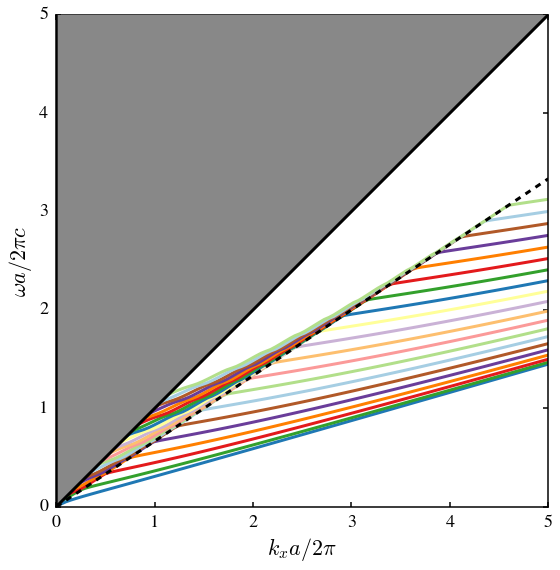

In [83]:
fig,ax = plt.subplots()

ax.plot(kx2, omega_tm2, '-', lw=3, ms=8);
ax.plot(kx2,2/3*kx2, 'k--', lw=3)
ax.fill_between(kx2, kx2, 100, facecolor='#888888', edgecolor='k', linewidth=3, zorder=5)
ax.set_ylim(0,5);
ax.set_xlim(0,5);
ax.set_aspect('equal');
ax.set_xlabel(r"${k_x a}/{2\pi}$");
ax.set_ylabel(r"${\omega a}/{2\pi c}$");

fig.tight_layout()
fig.savefig("3c-2.pdf", bbox_inches='tight', facecolor='none')

In [84]:
# num_fields_to_plot = 3
fields_to_plot = [5, 10]

fig,ax = plt.subplots()

# for i in range(1,1+num_fields_to_plot):
for i in fields_to_plot:
    with h5py.File("./3c/2dwaveguide-modAGA-e.k01.b%02d.z.tm.h5" % i) as field_data:
        efield = field_data["z.r"].value[0]
        Y_max = field_data["lattice vectors"].value[1,1] / 2
        nY = efield.shape[0]
        Y = np.mgrid[-Y_max:Y_max:1j*nY]
        
        ax.plot(Y, efield, lw=3, label="Mode %d" % i)
ax.set_xlabel("Y-position");
ax.set_ylabel("$E_z$");        
ax.legend();
fig.savefig("3c-3.pdf", bbox_inches='tight', facecolor='none')

---

### Problem 3d

- Modified structure (epsilon plotted below). 
- find band structure for TM bands
  - should there be guided modes as $k\to0$?

In [42]:
%%sh
cd 3d
mpb num-bands=3 k-interp=1000 2dwaveguide-modAGA2.ctl > 2dwaveguide-modAGA2.out
grep tmfreqs: 2dwaveguide-modAGA2.out > tm.all.dat
cd ..


Some deprecated features have been used.  Set the environment
variable GUILE_WARN_DEPRECATED to "detailed" and rerun the
program to get more information.  Set it to "no" to suppress
this message.


In [85]:
with h5py.File('./3d/2dwaveguide-modAGA2-epsilon.h5', 'r') as eps_file:
    print(list(eps_file.keys()))
    print()
    print(eps_file["description"].value)
#     print()
#     print(eps_file["data"].value)
    epsilon = eps_file["data"].value
    Y_max = eps_file["lattice vectors"].value[1,1] / 2
    nY = epsilon.shape[1]
    Y = np.mgrid[-Y_max:Y_max:1j*nY]

['data', 'description', 'epsilon.xx', 'epsilon.xy', 'epsilon.xz', 'epsilon.yy', 'epsilon.yz', 'epsilon.zz', 'epsilon_inverse.xx', 'epsilon_inverse.xy', 'epsilon_inverse.xz', 'epsilon_inverse.yy', 'epsilon_inverse.yz', 'epsilon_inverse.zz', 'lattice vectors']

b'dielectric function, epsilon'


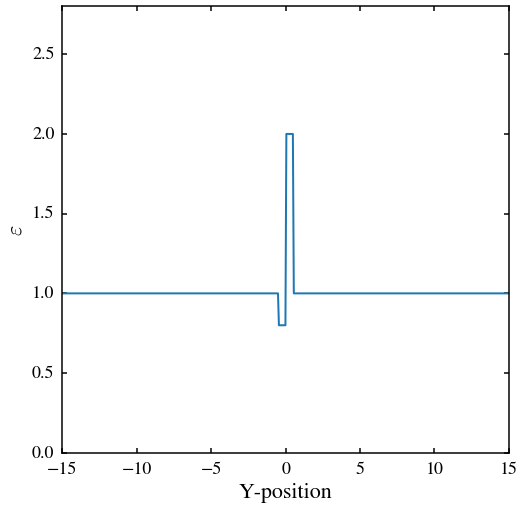

In [86]:
fig,ax = plt.subplots();
ax.plot(Y,epsilon[0]);
# for x0 in [-0.5, 0, 0.5]:
#     ax.axvline(x0, c='k', ls='--', zorder=-1)
# for y0 in [0.8, 1, 2]:
#     ax.axhline(y0, c='k', ls='--', zorder=-1)
ax.set_ylim(0,2.8);
ax.set_xlim(-Y_max, Y_max);
ax.set_xlabel("Y-position");
ax.set_ylabel(r"$\varepsilon$");
fig.savefig("3d-1.pdf", bbox_inches='tight', facecolor='none')

In [87]:
tm_y_df3 = pd.read_csv('./3d/tm.all.dat', index_col=[0,1], skipinitialspace=True, skipfooter=2, engine='python').loc["tmfreqs:"]
# get kx values - both even and odd omega are computed at the same k-values
kx3 = tm_y_df3.k1.values

# get frequency values for each band
omega_tm3 = tm_y_df3[["tm band %d" % i for i in range(1,4)]]


In [88]:
print(omega_tm3.columns)

Index(['tm band 1', 'tm band 2', 'tm band 3'], dtype='object')


In [89]:
fig,ax = plt.subplots()

ax.plot(kx3, omega_tm3, '-', lw=3, ms=8);
# ax.plot(kx3,kx3, 'k--', lw=3)
ax.fill_between(kx3, kx3, 100, facecolor='#888888', edgecolor='k', linewidth=3, zorder=5)
ax.set_ylim(0,1);
ax.set_xlim(0,1);
ax.set_aspect('equal');
ax.set_xlabel(r"${k_x a}/{2\pi}$");
ax.set_ylabel(r"${\omega a}/{2\pi c}$");

fig.tight_layout()
fig.savefig("3d-2.pdf", bbox_inches='tight', facecolor='none')

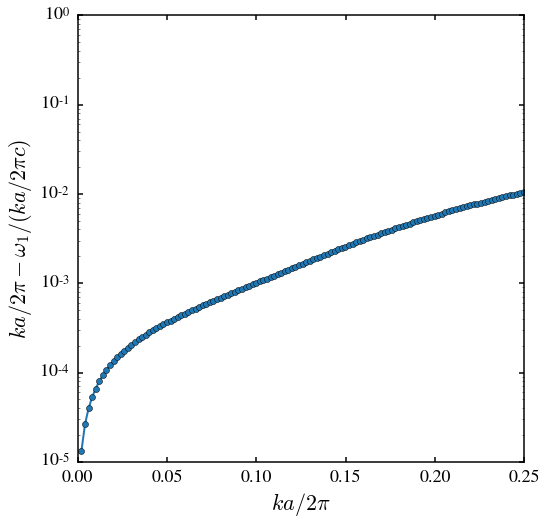

In [91]:
plt.plot(kx3[1:], (kx3 - omega_tm3["tm band 1"])[1:], 'o-')
plt.xlim(0,0.25);
# plt.ylim(0,0.25);
plt.yscale('log');
plt.ylabel(r'$ka/2\pi - \omega_1 / (ka/2\pi c)$');
plt.xlabel(r'$ka/2\pi$');
plt.gcf().savefig("3d-3.pdf", bbox_inches='tight', facecolor='none')

In [141]:
print(kx3 - omega_tm3["tm band 1"])

k index
1       0.000000
2       0.000013
3       0.000026
4       0.000040
5       0.000053
6       0.000066
7       0.000080
8       0.000093
9       0.000107
10      0.000120
11      0.000134
12      0.000148
13      0.000162
14      0.000176
15      0.000190
16      0.000205
17      0.000220
18      0.000235
19      0.000250
20      0.000265
21      0.000281
22      0.000297
23      0.000313
24      0.000330
25      0.000347
26      0.000364
27      0.000382
28      0.000400
29      0.000419
30      0.000438
          ...   
973     0.482290
974     0.482900
975     0.483510
976     0.484130
977     0.484750
978     0.485370
979     0.485990
980     0.486600
981     0.487220
982     0.487840
983     0.488460
984     0.489080
985     0.489690
986     0.490310
987     0.490920
988     0.491540
989     0.492160
990     0.492770
991     0.493390
992     0.494010
993     0.494630
994     0.495250
995     0.495860
996     0.496480
997     0.497100
998     0.497720
999     0.498340
1000  

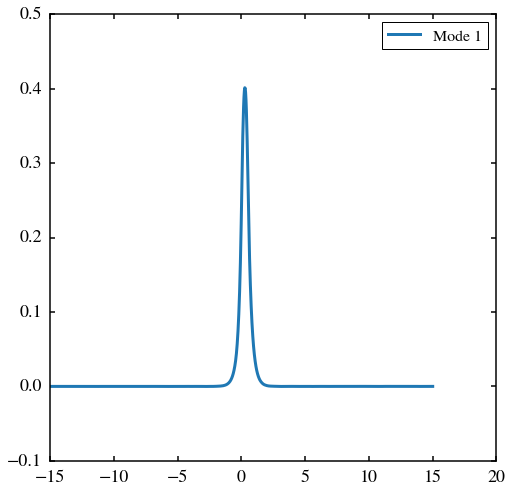

In [142]:
# num_fields_to_plot = 3
fields_to_plot = [1]

fig,ax = plt.subplots()

# for i in range(1,1+num_fields_to_plot):
for i in fields_to_plot:
    with h5py.File("./3d/2dwaveguide-modAGA2-e.k01.b%02d.z.tm.h5" % i) as field_data:
        efield = field_data["z.r"].value[0]
        Y_max = field_data["lattice vectors"].value[1,1] / 2
        nY = efield.shape[0]
        Y = np.mgrid[-Y_max:Y_max:1j*nY]
        
        ax.plot(Y, efield, lw=3, label="Mode %d" % i)
        
ax.legend();

---

# Problem 4

In [192]:
a = 1
eps1 = 12
eps2 = 1
d1q = a*np.sqrt(eps2) / (np.sqrt(eps1) + np.sqrt(eps2))
d2q = a*np.sqrt(eps1) / (np.sqrt(eps1) + np.sqrt(eps2))
ds = np.mgrid[0:1:0.01]

In [193]:
gapinfo = !cd 4a && for d in `seq 0 0.01 1`; do mpb d1=$d bandgap1d.ctl | grep "Gap from band 1"; done && cd ..

In [194]:
gapsize = np.array(list(map(lambda x: x.split(',')[1][1:-1], gapinfo)), dtype=np.float32)

0.22 74.4391
0.22400923774


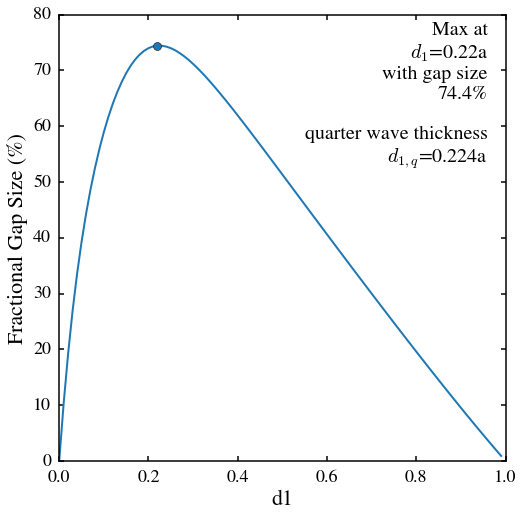

In [195]:
fig,ax = plt.subplots()
ax.plot(ds,gapsize);
ax.set_ylabel("Fractional Gap Size (%)")
ax.set_xlabel("d1");
i0 = np.argmax(gapsize)
d0 = ds[i0]
g0 = gapsize[i0]
ax.set_prop_cycle(None)
ax.plot([d0], [g0], 'o', ms=8)
ax.text(.96, 78, "Max at\n$d_1$=0.22a\nwith gap size\n74.4%\n\n quarter wave thickness\n$d_{1,q}$=0.224a", fontsize=20, 
        horizontalalignment="right", verticalalignment="top")
print(d0, g0)
print(d1q)
fig.savefig("./4a-1.pdf", bbox_inches='tight', facecolor='none')

In [196]:
eps1 = 12
eps2 = 1

In [197]:
%%sh
cd 4a
mpb d1=0.22401 num-bands=8 bandgap1d.ctl | grep tmfreqs > tm.bandgap1.dat
mpb d1=0.12345 num-bands=8 bandgap1d.ctl | grep tmfreqs > tm.bandgap2.dat 
cd ..

In [198]:
kbands1 = pd.read_csv('./4a/tm.bandgap1.dat', index_col=[0,1], skipinitialspace=True).loc["tmfreqs:"]
kbands2 = pd.read_csv('./4a/tm.bandgap2.dat', index_col=[0,1], skipinitialspace=True).loc["tmfreqs:"]
kx = kbands1["k1"].values

omega1 = kbands1[["tm band %d" % i for i in range(1,9)]]
omega2 = kbands2[["tm band %d" % i for i in range(1,9)]]

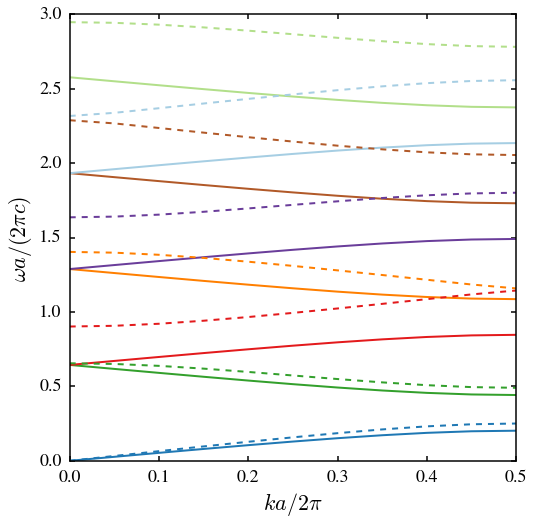

In [201]:
fig,ax = plt.subplots()
ax.plot(kx, omega1, '-');
ax.set_prop_cycle(None)
ax.plot(kx, omega2, '--');

ax.set_ylabel("$\omega a / (2\pi c)$");
ax.set_xlabel("$k a/ 2\pi$");

fig.savefig("4c-1.pdf", bbox_inches='tight', facecolor='none')